In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")


In [18]:
climate_data = pd.read_csv('Climate_data.csv')
climate_data = climate_data.dropna(axis=1)

climate_data.columns = climate_data.iloc[0]
climate_data = climate_data[1:]
climate_data.reset_index(drop=True, inplace=True)
climate_data

,Month,TMAX,TMIN,RMEAN,Month,TMAX,TMIN,RMEAN,Month,TMAX,TMIN,RMEAN
0,1,25.6,16.7,81,1,26.7,16.4,73.2,1,26.4,16.3,76.4
1,2,26.3,15.5,75.9,2,25.7,16.8,70,2,26.9,14.7,62.5
2,3,25.7,15,72.7,3,26.3,16.3,66.8,3,27.2,13.4,57.9
3,4,25.2,14,63.5,4,24.8,13.2,62.3,4,26.1,12.3,64.3
4,5,23.8,10.5,59.6,5,22.2,10.1,62.4,5,24,9,63.3
5,6,22.3,8.9,57.9,6,20.7,8.9,66.2,6,22,6.7,59.4
6,7,22.9,7.3,56.6,7,20.9,6.5,66.2,7,21.5,5.4,56
7,8,23.8,8.3,52.6,8,22.9,7.7,63.6,8,24.5,8.5,50.6
8,9,27.7,10.6,46.6,9,27.4,12.2,57.3,9,27.7,10.7,43.4
9,10,29.6,14.8,46.2,10,28.4,14.2,56.2,10,29.6,14.9,55.3


In [19]:

columns = ['Month', 'TMAX', 'TMIN', 'RMEAN', 'Month2', 'TMAX2', 'TMIN2', 'RMEAN2', 'Month3', 'TMAX3', 'TMIN3', 'RMEAN3']
climate_data.columns = columns


In [20]:
import numpy as np

climate_data['Month'] = pd.to_numeric(climate_data['Month'], errors='coerce')
climate_data['TMAX'] = pd.to_numeric(climate_data['TMAX'], errors='coerce')

climate_data['TMIN'] = climate_data['TMIN'].apply(lambda x: np.mean([float(num) for num in str(x).split('.')]) if isinstance(x, str) else x)

climate_data


,Month,TMAX,TMIN,RMEAN,Month2,TMAX2,TMIN2,RMEAN2,Month3,TMAX3,TMIN3,RMEAN3
0,1,25.6,11.5,81,1,26.7,16.4,73.2,1,26.4,16.3,76.4
1,2,26.3,10.0,75.9,2,25.7,16.8,70,2,26.9,14.7,62.5
2,3,25.7,15.0,72.7,3,26.3,16.3,66.8,3,27.2,13.4,57.9
3,4,25.2,14.0,63.5,4,24.8,13.2,62.3,4,26.1,12.3,64.3
4,5,23.8,7.5,59.6,5,22.2,10.1,62.4,5,24,9,63.3
5,6,22.3,8.5,57.9,6,20.7,8.9,66.2,6,22,6.7,59.4
6,7,22.9,5.0,56.6,7,20.9,6.5,66.2,7,21.5,5.4,56
7,8,23.8,5.5,52.6,8,22.9,7.7,63.6,8,24.5,8.5,50.6
8,9,27.7,8.0,46.6,9,27.4,12.2,57.3,9,27.7,10.7,43.4
9,10,29.6,11.0,46.2,10,28.4,14.2,56.2,10,29.6,14.9,55.3


The linear regression equation is:
RMEAN3 = 1.26 * Month + -5.02 * TMAX + -0.97 * TMIN + 1.26 * RMEAN + 1.26 * Month2 + 2.91 * TMAX2 + 1.84 * TMIN2 + -3.28 * RMEAN2 + 1.26 * Month3 + -12.08 * TMAX3 + 7.44 * TMIN3 + 440.48


/Users/visheshyadav/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


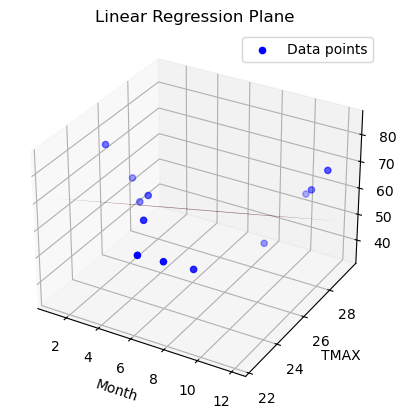

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

climate_data = climate_data.apply(pd.to_numeric, errors='coerce')

climate_data = climate_data.dropna()

X = climate_data.iloc[:, :-1]

y = climate_data['RMEAN3']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

terms = [f'{coef:.2f} * {name}' for coef, name in zip(coefficients, X.columns)]
equation = "RMEAN3 = " + " + ".join(terms) + f" + {intercept:.2f}"

print('The linear regression equation is:')
print(equation)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(climate_data['Month'], climate_data['TMAX'], y, color='blue', label='Data points')

x_surf, y_surf = np.meshgrid(np.linspace(climate_data['Month'].min(), climate_data['Month'].max(), 100),
                             np.linspace(climate_data['TMAX'].min(), climate_data['TMAX'].max(), 100))

X_surf = np.c_[x_surf.ravel(), y_surf.ravel()]
X_surf = pd.DataFrame(X_surf, columns=['Month', 'TMAX'])

for col in ['TMIN', 'RMEAN', 'Month2', 'TMAX2', 'TMIN2', 'RMEAN2', 'Month3', 'TMAX3', 'TMIN3']:
    X_surf[col] = climate_data[col].mean()

z_surf = model.predict(X_surf.values).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('Month')
ax.set_ylabel('TMAX')
ax.set_zlabel('RMEAN3')
ax.set_title('Linear Regression Plane')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 1.0062402866274773
Mean Squared Error (MSE): 2.095382237098534
R-squared (R2) Score: 0.9708908149198661


In [ ]:
default_values = {
    'TMIN': climate_data['TMIN'].mean(),
    'RMEAN': climate_data['RMEAN'].mean(),
    'Month2': climate_data['Month2'].mean(),
    'TMAX2': climate_data['TMAX2'].mean(),
    'TMIN2': climate_data['TMIN2'].mean(),
    'RMEAN2': climate_data['RMEAN2'].mean(),
    'Month3': climate_data['Month3'].mean(),
    'TMAX3': climate_data['TMAX3'].mean(),
    'TMIN3': climate_data['TMIN3'].mean()
}

while True:
    month = float(input("Enter the month (1-12): "))
    tmax = float(input("Enter the maximum temperature: "))

    input_data = pd.DataFrame({'Month': [month], 'TMAX': [tmax]})
    for col, value in default_values.items():
        input_data[col] = value

    predicted_rmean3 = model.predict(input_data.values)[0]

    print(f"The predicted RMEAN3 for Month={month} and TMAX={tmax} is: {predicted_rmean3:.2f}")

    cont = input("Do you want to continue? (yes/no): ")
    if cont.lower() != 'yes':
        break
